In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import skimage
from skimage import filters, io

from ipywidgets import interactive, interact, IntSlider, FloatSlider
import ipywidgets as widgets

In [20]:
plt.rcParams['figure.figsize'] = [16, 8]

In [31]:
global f
f="/media/jbruno/big_media/575_data/LFH_test_images/initial_evaluation_probe_1913/cropped_images/IMG_8849_cropped_2.jpg"
#f="/home/jbruno/Documents/UW/575-egypt/our-repo/image_processing/jb_w_shadow.jpg"

In [18]:

def get_binary_image(window_size=11, k=0.5):
    global f
    grey_image = io.imread(f, as_grey=True)
    binary_sauvola = filters.threshold_sauvola(grey_image, window_size=window_size, k=k)
    binary_image = grey_image > binary_sauvola
    plt.axis('off')
    plt.imshow(binary_image, cmap=plt.cm.gray)

In [26]:
interact(get_binary_image,
         window_size=IntSlider(min=3, max=101, step=2, value = 11, continuous_update=False),
         k=FloatSlider(min=0.0, max=1, step=0.01, value = 0.05, continuous_update=False))

interactive(children=(IntSlider(value=11, continuous_update=False, description='window_size', max=101, min=3, …

<function __main__.get_binary_image>

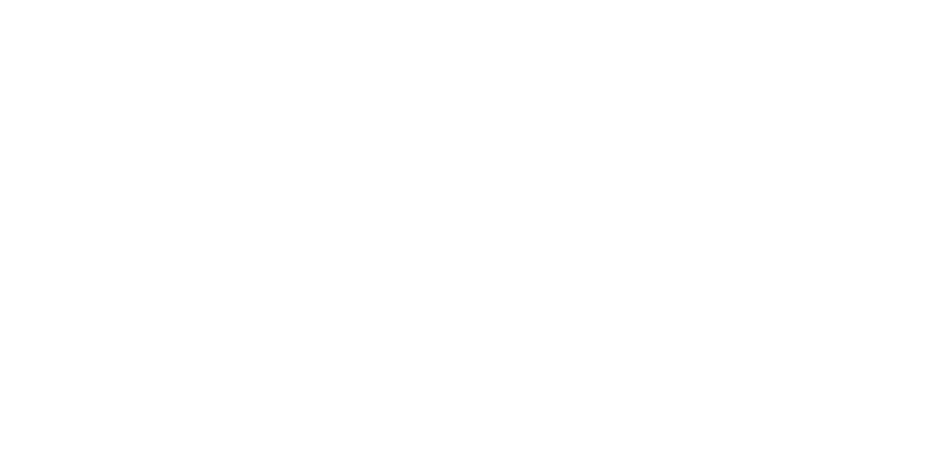

In [32]:
    global f
    grey_image = io.imread(f, as_grey=True)
    binary_sauvola = filters.threshold_sauvola(grey_image, window_size=71, k=0.10)
    binary_image = grey_image > binary_sauvola
    plt.axis('off')
    plt.imsave(arr=binary_image, fname="test_71_0.10.png", cmap=plt.cm.gray)

In [29]:
plt.imsave?


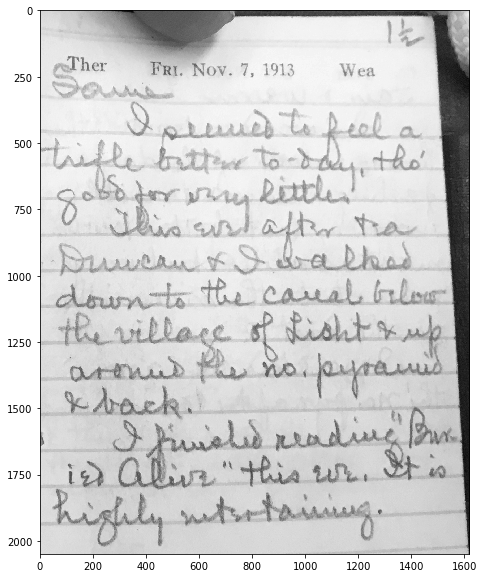

In [63]:

plt.imshow(grey_image, cmap=plt.cm.gray)
plt.savefig('/home/jbruno/Documents/UW/575-egypt/our-repo/image_processing/grey.png', bbox_inches='tight')


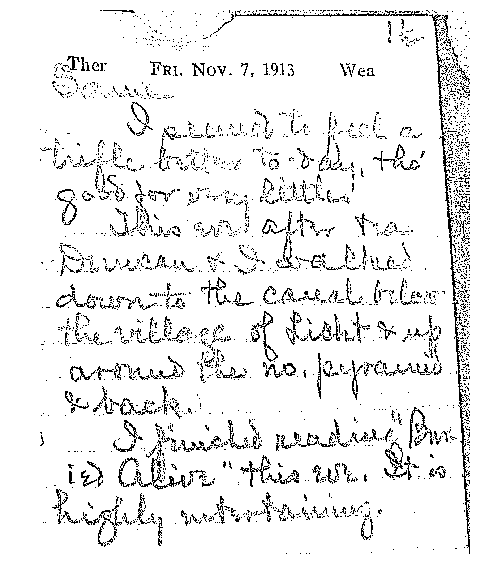

In [80]:
binary_sauvola = filters.threshold_sauvola(grey_image, window_size=11, k=.05)
binary_image = grey_image > binary_sauvola
plt.axis('off')
plt.imshow(binary_image, cmap=plt.cm.gray)
plt.savefig('/home/jbruno/Documents/UW/575-egypt/our-repo/image_processing/test5.png', bbox_inches='tight')

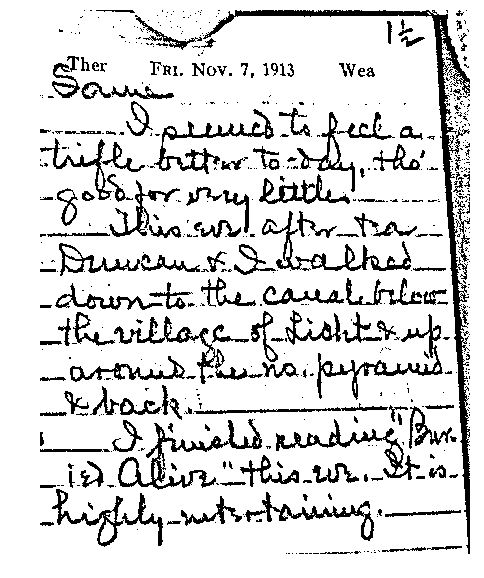

In [130]:
binary_sauvola = filters.threshold_sauvola(grey_image, window_size=45, k=.05)
binary_image = grey_image > binary_sauvola
plt.axis('off')
plt.imshow(binary_image, cmap=plt.cm.gray)
plt.savefig('/home/jbruno/Documents/UW/575-egypt/our-repo/image_processing/test4.png', bbox_inches='tight')

In [82]:
from skimage import exposure


In [88]:
equalized = exposure.equalize_adapthist(grey_image)

/home/jbruno/.conda/envs/575ocr/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


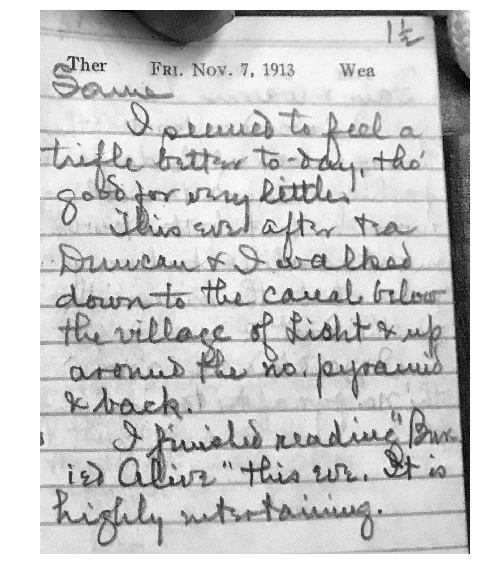

In [91]:
plt.imshow(equalized, cmap=plt.cm.gray)
plt.axis('off')
plt.savefig('equalized.png', bbox_inches='tight')

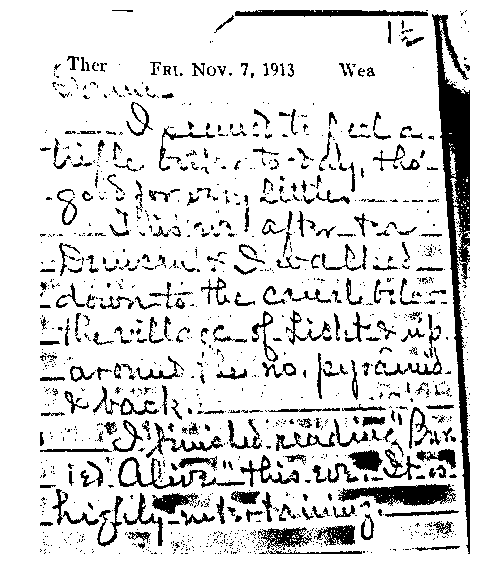

In [95]:
binary_sauvola = filters.threshold_sauvola(equalized, window_size=55, k=.05)
binary_image = grey_image > binary_sauvola
plt.axis('off')
plt.imshow(binary_image, cmap=plt.cm.gray)
#plt.savefig('/home/jbruno/Documents/UW/575-egypt/our-repo/image_processing/test4.png', bbox_inches='tight')

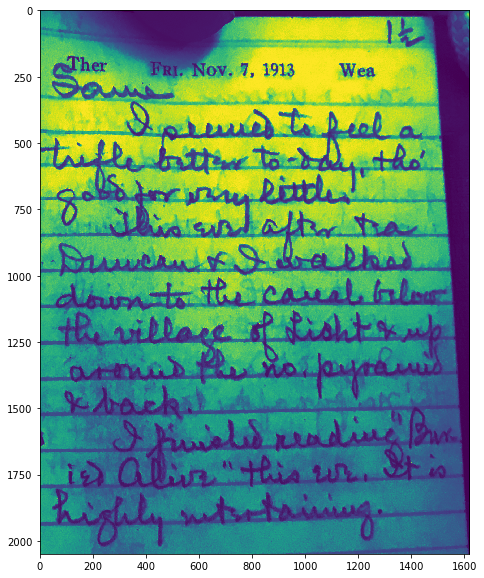

In [113]:
equalized = exposure.equalize_hist(grey_image)
plt.imshow(equalized)

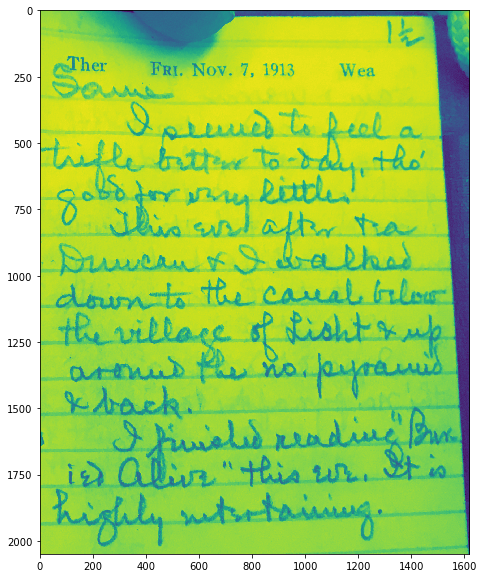

In [119]:
plt.imshow(grey_image)

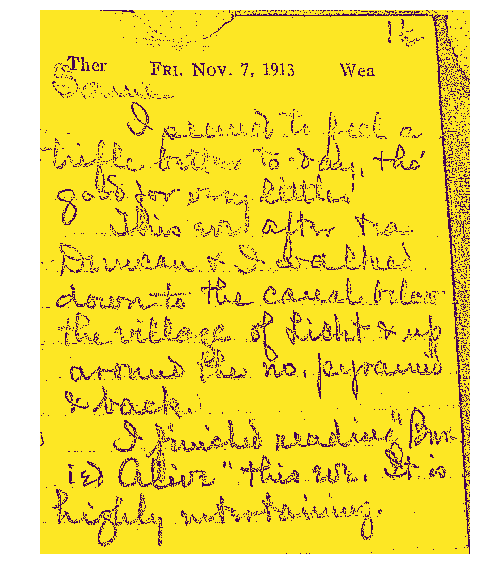

In [124]:
binary_sauvola = filters.threshold_sauvola(grey_image, window_size=11, k=.05)
binary_image = grey_image > binary_sauvola
equalized = exposure.equalize_hist(binary_image)
plt.imshow(equalized)
plt.axis('off')
plt.imshow(binary_image)

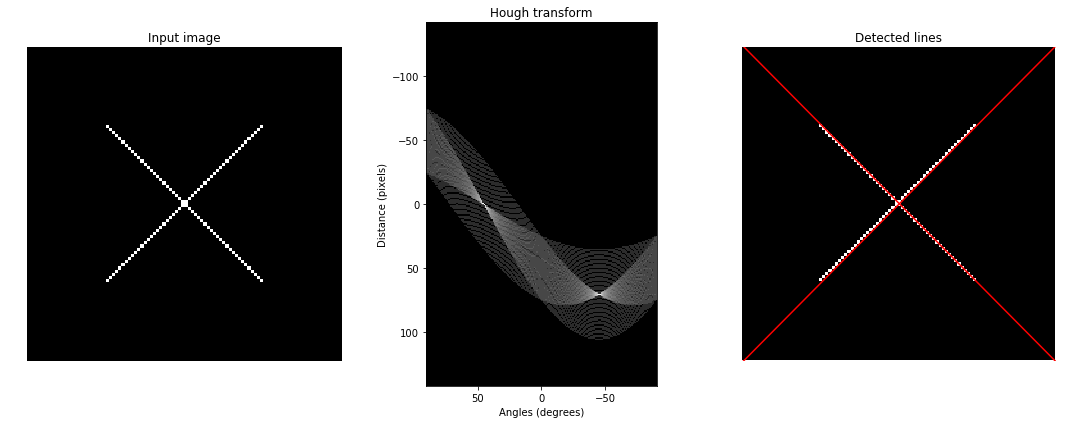

In [127]:
import numpy as np

from skimage.transform import (hough_line, hough_line_peaks,
                               probabilistic_hough_line)
from skimage.feature import canny
from skimage import data

import matplotlib.pyplot as plt
from matplotlib import cm


# Constructing test image
image = np.zeros((100, 100))
idx = np.arange(25, 75)
image[idx[::-1], idx] = 255
image[idx, idx] = 255

# Classic straight-line Hough transform
h, theta, d = hough_line(image)

# Generating figure 1
fig, axes = plt.subplots(1, 3, figsize=(15, 6))
ax = axes.ravel()

ax[0].imshow(image, cmap=cm.gray)
ax[0].set_title('Input image')
ax[0].set_axis_off()

ax[1].imshow(np.log(1 + h),
             extent=[np.rad2deg(theta[-1]), np.rad2deg(theta[0]), d[-1], d[0]],
             cmap=cm.gray, aspect=1/1.5)
ax[1].set_title('Hough transform')
ax[1].set_xlabel('Angles (degrees)')
ax[1].set_ylabel('Distance (pixels)')
ax[1].axis('image')

ax[2].imshow(image, cmap=cm.gray)
for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
    y0 = (dist - 0 * np.cos(angle)) / np.sin(angle)
    y1 = (dist - image.shape[1] * np.cos(angle)) / np.sin(angle)
    ax[2].plot((0, image.shape[1]), (y0, y1), '-r')
ax[2].set_xlim((0, image.shape[1]))
ax[2].set_ylim((image.shape[0], 0))
ax[2].set_axis_off()
ax[2].set_title('Detected lines')

plt.tight_layout()
plt.show()


In [131]:
# Classic straight-line Hough transform
h, theta, d = hough_line(binary_image)

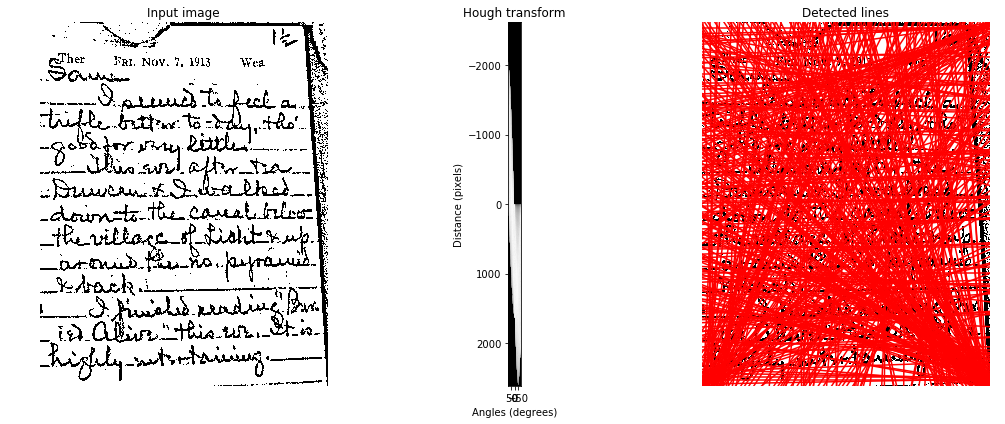

In [133]:
# Classic straight-line Hough transform
h, theta, d = hough_line(binary_image)

# Generating figure 1
fig, axes = plt.subplots(1, 3, figsize=(15, 6))
ax = axes.ravel()

ax[0].imshow(binary_image, cmap=cm.gray)
ax[0].set_title('Input image')
ax[0].set_axis_off()

ax[1].imshow(np.log(1 + h),
             extent=[np.rad2deg(theta[-1]), np.rad2deg(theta[0]), d[-1], d[0]],
             cmap=cm.gray, aspect=1/1.5)
ax[1].set_title('Hough transform')
ax[1].set_xlabel('Angles (degrees)')
ax[1].set_ylabel('Distance (pixels)')
ax[1].axis('image')

ax[2].imshow(binary_image, cmap=cm.gray)
for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
    y0 = (dist - 0 * np.cos(angle)) / np.sin(angle)
    y1 = (dist - binary_image.shape[1] * np.cos(angle)) / np.sin(angle)
    ax[2].plot((0, binary_image.shape[1]), (y0, y1), '-r')
ax[2].set_xlim((0, binary_image.shape[1]))
ax[2].set_ylim((binary_image.shape[0], 0))
ax[2].set_axis_off()
ax[2].set_title('Detected lines')

plt.tight_layout()
plt.show()


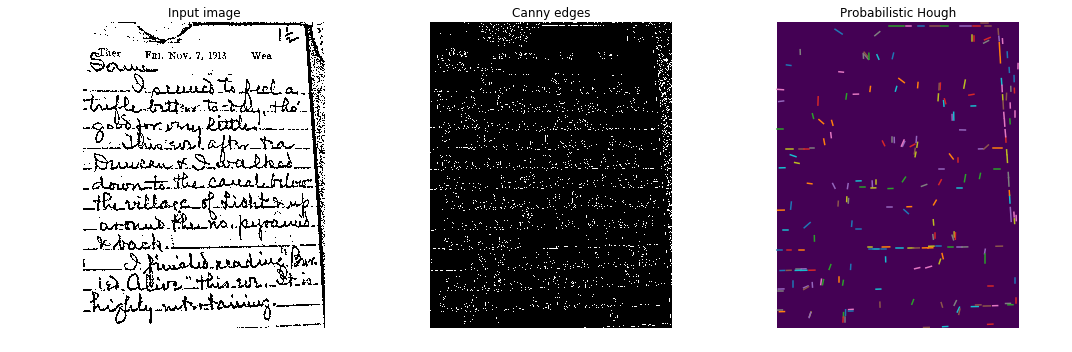

In [148]:
# Line finding using the Probabilistic Hough Transform
edges = canny(binary_image, 2, 1, 25)
lines = probabilistic_hough_line(edges, threshold=10, line_length=30,
                                 line_gap=3)

# Generating figure 2
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(binary_image, cmap=cm.gray)
ax[0].set_title('Input image')

ax[1].imshow(edges, cmap=cm.gray)
ax[1].set_title('Canny edges')

ax[2].imshow(edges * 0)
for line in lines:
    p0, p1 = line
    ax[2].plot((p0[0], p1[0]), (p0[1], p1[1]))
ax[2].set_xlim((0, binary_image.shape[1]))
ax[2].set_ylim((binary_image.shape[0], 0))
ax[2].set_title('Probabilistic Hough')

for a in ax:
    a.set_axis_off()

plt.tight_layout()
plt.show()

In [138]:
binary_image = skimage.img_as_ubyte(binary_image)

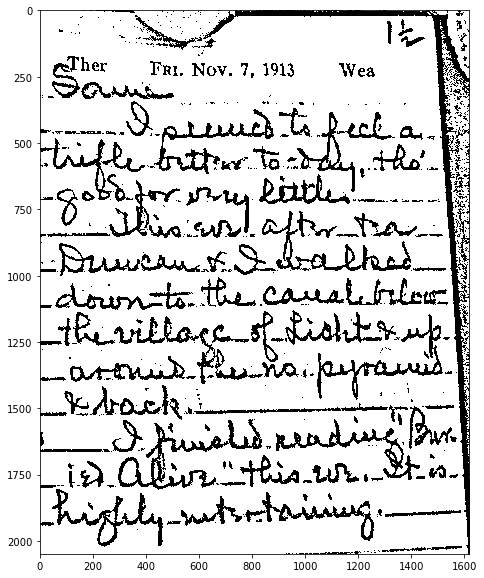

In [141]:
plt.imshow(binary_image, cmap=plt.cm.gray)

In [149]:
binary_image

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ..., 
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0]], dtype=uint8)